# Item 6

### Explain the difference between object localization and image classification. Show examples of this.

- Clasificación de imágenes:

    La clasificación de imágenes consiste en asignar una etiqueta o categoría a una imagen completa. Es decir, el objetivo es determinar qué objeto o concepto está presente en la imagen en su totalidad.
    
    Por ejemplo, en un conjunto de datos de clasificación de imágenes de animales, el modelo puede estar entrenado para reconocer diferentes tipos de animales como perros, gatos, pájaros, etc. A partir de una imagen, el modelo determina la clase a la que pertenece el animal representado en su totalidad.
    
    En un caso específico, por ejemplo dada una imagen de un gato, el modelo de clasificación de imágenes debe determinar que la imagen representa un gato en su totalidad, sin preocuparse por la ubicación exacta del gato en la imagen.

- Localización de objetos:

    La localización de objetos implica delimitar la ubicación espacial de un objeto dentro de la imagen. Esto implica detectar la presencia de objetos específicos y dibujar un cuadro delimitador alrededor de ellos.

    Por ejemplo, en un conjunto de datos de localización de objetos en imágenes de perros, el modelo no solo debe identificar si hay un objeto perro en la imagen, sino también dibujar un rectángulo alrededor del perro para indicar su ubicación específica en la imagen.

    Otro caso, por ejemplo teniendo una imagen de una calle con varios objetos, incluyendo un auto, una señal de tránsito y un semáforo, el modelo de localización de objetos no solo debe reconocer la presencia del objeto auto, sino también delimitar su ubicación mediante un rectángulo que rodea al mismo en la imagen.



En resumen, mientras que la clasificación de imágenes se centra en identificar la clase general de la imagen, la localización de objetos implica identificar la ubicación específica de los objetos dentro de la imagen. Ambos son componentes importantes en aplicaciones de visión por computadora y pueden combinarse en sistemas más avanzados de detección y reconocimiento de objetos.

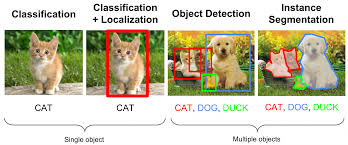

#### Ejemplo con código de clasificación

Se probarán diferentes imágenes del mismo animal para evaluar cómo funciona el modelo ante distintas distancias entre la cámara y el animal y diferentes iluminaciones.

In [11]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Se muestran las imágenes a clasificar

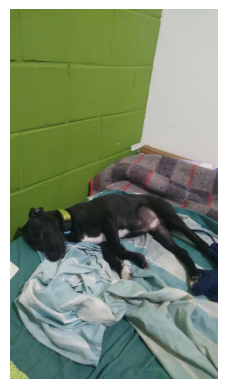

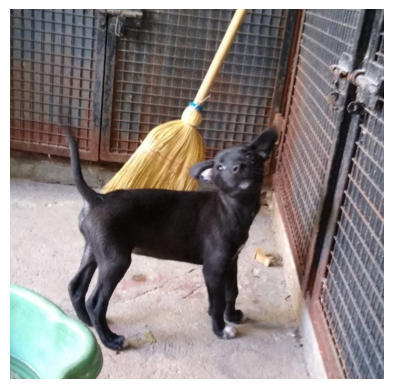

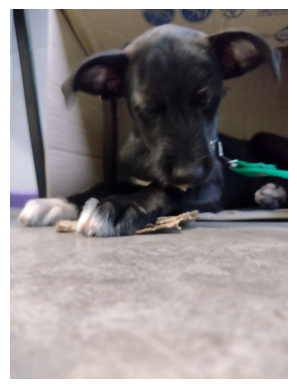

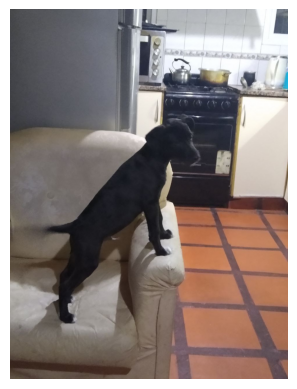

In [12]:
# Prueba con una imagen local
img_paths = ['./Sirius/Sirius-acostado.jpg', './Sirius/Sirius-cuerpo-entero.jpg',
             './Sirius/Sirius-primer-plano-borroso.jpg', './Sirius/Sirius-cuerpo-entero-contraluz.jpg']# Reemplaza con la ruta de tu imagen

for i, img_path in enumerate(img_paths):
    # Cargar la imagen
    imagen = mpimg.imread(img_paths[i])



    # Mostrar la imagen
    plt.imshow(imagen)
    plt.axis('off')
    plt.show()

In [13]:
# Cargar el modelo preentrenado EfficientNetB0
model = EfficientNetB0(weights='imagenet')

def classify_image(img_path):
    # Cargar y preparar la imagen
    img = Image.open(img_path)
    img = img.resize((224, 224))  # Tamaño de entrada para EfficientNetB0

    # Convertir la imagen a un array y procesarla
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Realizar la predicción con el modelo
    predictions = model.predict(img_array)

    # Decodificar y retornar las predicciones
    return decode_predictions(predictions, top=3)[0]

In [14]:
# Prueba con una imagen local
img_paths = ['./Sirius/Sirius-acostado.jpg', './Sirius/Sirius-cuerpo-entero.jpg',
             './Sirius/Sirius-primer-plano-borroso.jpg', './Sirius/Sirius-cuerpo-entero-contraluz.jpg']# Reemplaza con la ruta de tu imagen

for i, img_path in enumerate(img_paths):
    predictions = classify_image(img_paths[i])

    print('\n')
    print(f'Predicciones para la imagen {i+1} titulada: {img_path}')
    # Mostrar las predicciones
    for i, (imagenet_id, label, score) in enumerate(predictions):
        print(f"{i + 1}: {label} ({score:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Predicciones para la imagen 1 titulada: ./Sirius/Sirius-acostado.jpg
1: quilt (0.19)
2: sleeping_bag (0.10)
3: stretcher (0.06)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Predicciones para la imagen 2 titulada: ./Sirius/Sirius-cuerpo-entero.jpg
1: Mexican_hairless (0.22)
2: Staffordshire_bullterrier (0.08)
3: toy_terrier (0.06)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Predicciones para la imagen 3 titulada: ./Sirius/Sirius-primer-plano-borroso.jpg
1: Italian_greyhound (0.23)
2: Mexican_hairless (0.12)
3: Chihuahua (0.07)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Predicciones para la imagen 4 titulada: ./Sirius/Sirius-cuerpo-entero-contraluz.jpg
1: Doberman (0.08)
2: Mexican_hairless (0.06)
3: Great_Dane (0.05)


El perro mostrado en las imágenes no es de raza por lo que es entendible que no le asigne una concreta con una probabilidad elevada. 

Aún así, la clasificación que es recurrente entre las distintas Mexican hairless. Otra con una de las probabilidades más elevadas que arrojó el modelo, aunque sigue sin ser alta, es Italian greyhound.

Se considera entonces, dadas las bajas probabilidades y las escazas similitudes que se pueden hallar entre las categorías predichas y el animal de las fotos, que el modelo de clasificación tiene un bajo rendimiento para realizar esta tarea.

#### Ejemplo con código de localización

In [15]:
# Importamos las librerías a utilizar
import cv2
from ultralytics import YOLO
from IPython.display import Image


0: 640x640 2 dogs, 1 bed, 190.3ms
1: 640x640 1 dog, 1 frisbee, 190.3ms
2: 640x640 1 dog, 1 bed, 190.3ms
3: 640x640 1 dog, 1 bowl, 1 oven, 1 refrigerator, 190.3ms
4: 640x640 1 cat, 1 dog, 1 suitcase, 1 couch, 1 book, 190.3ms
Speed: 4.6ms preprocess, 190.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


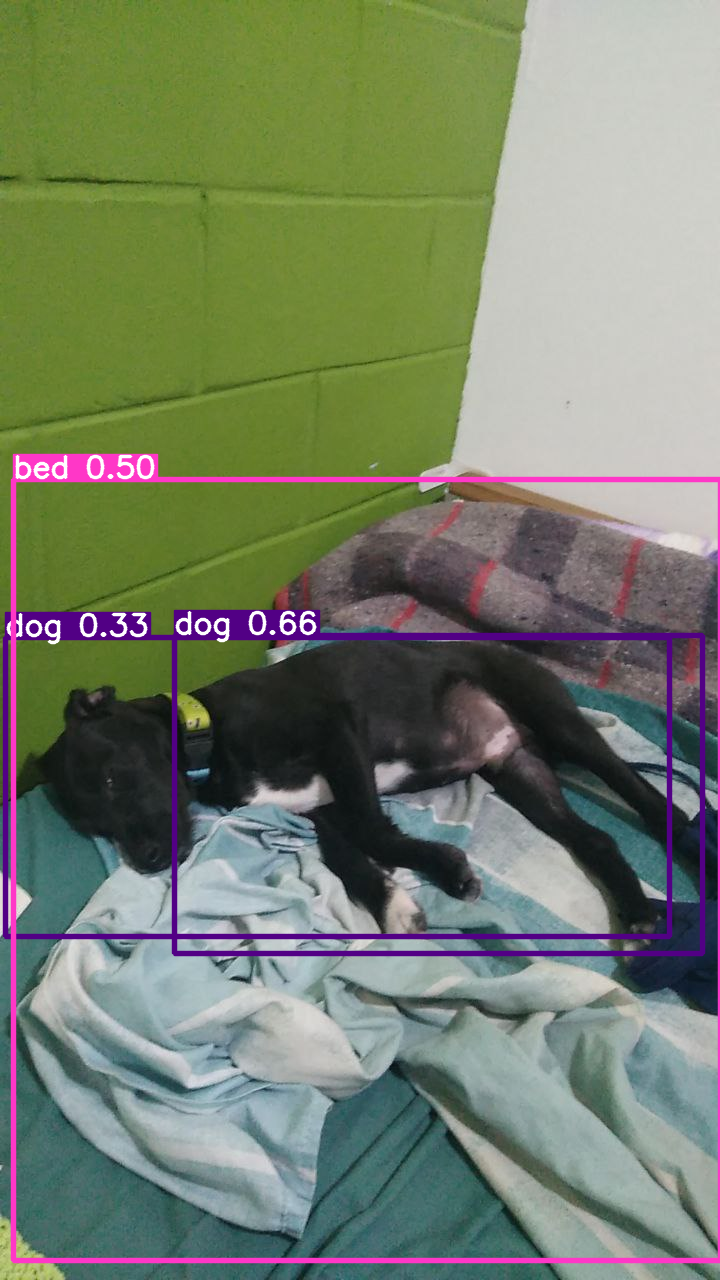

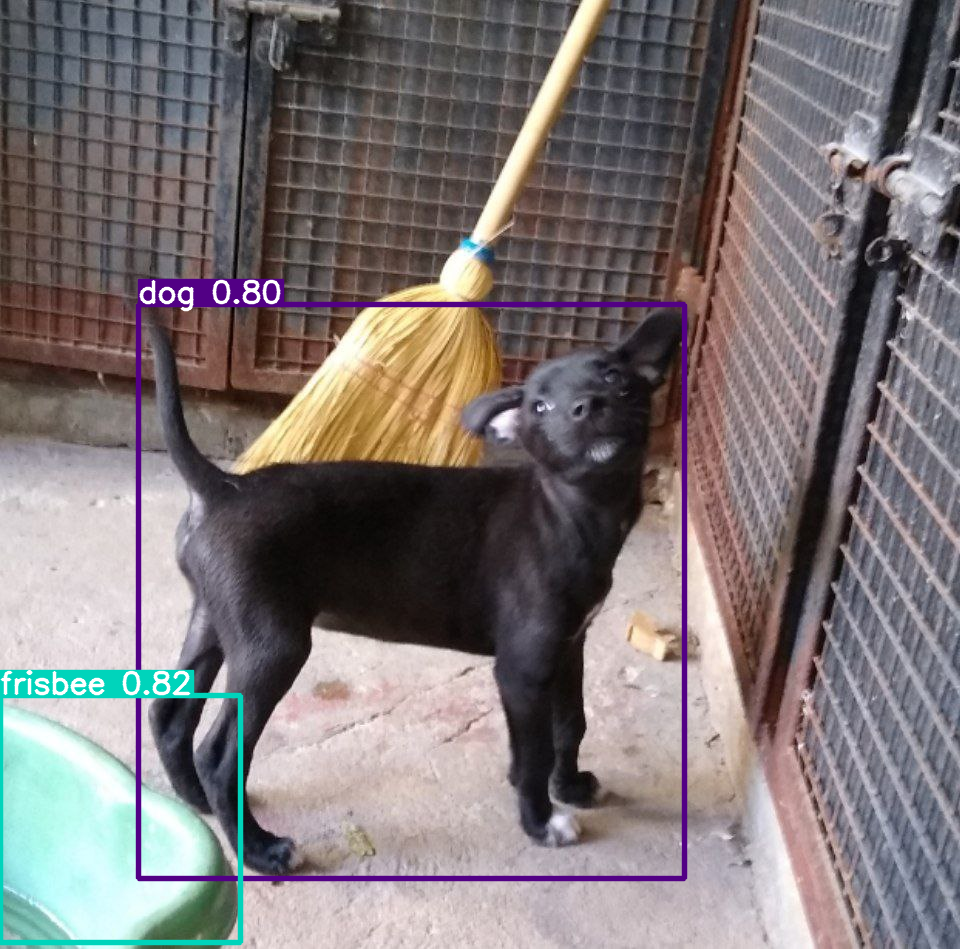

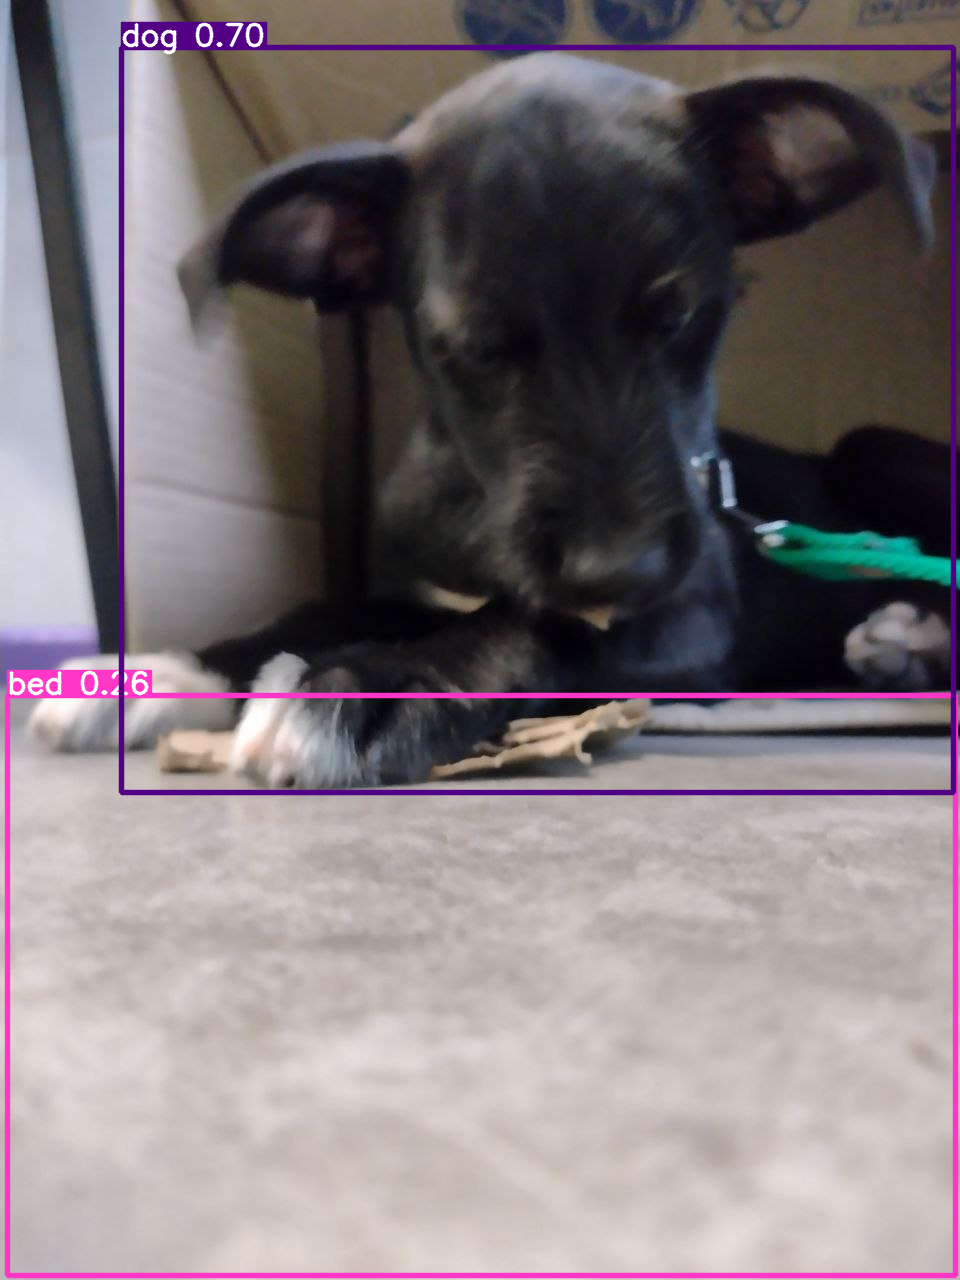

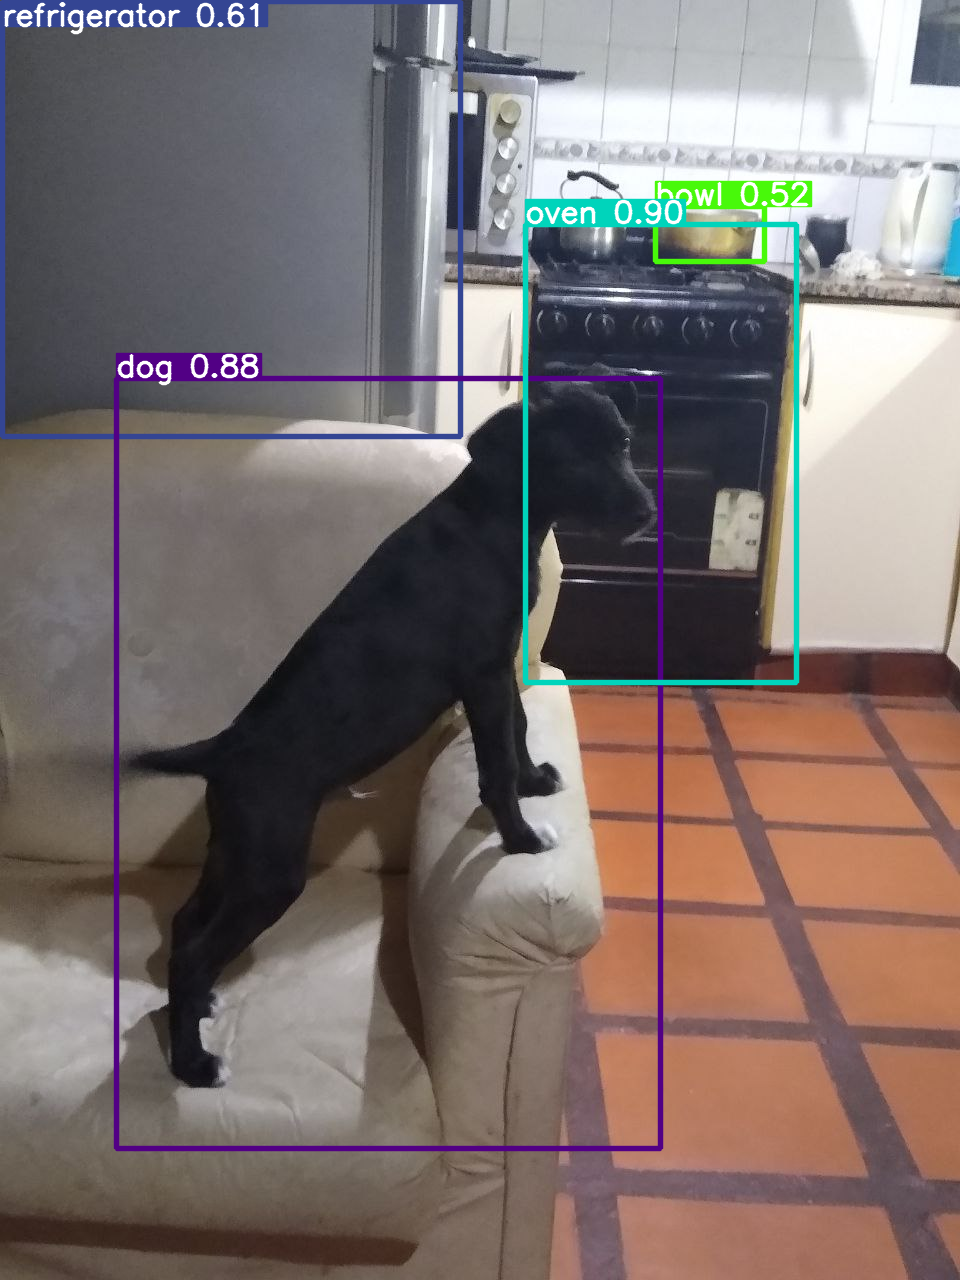

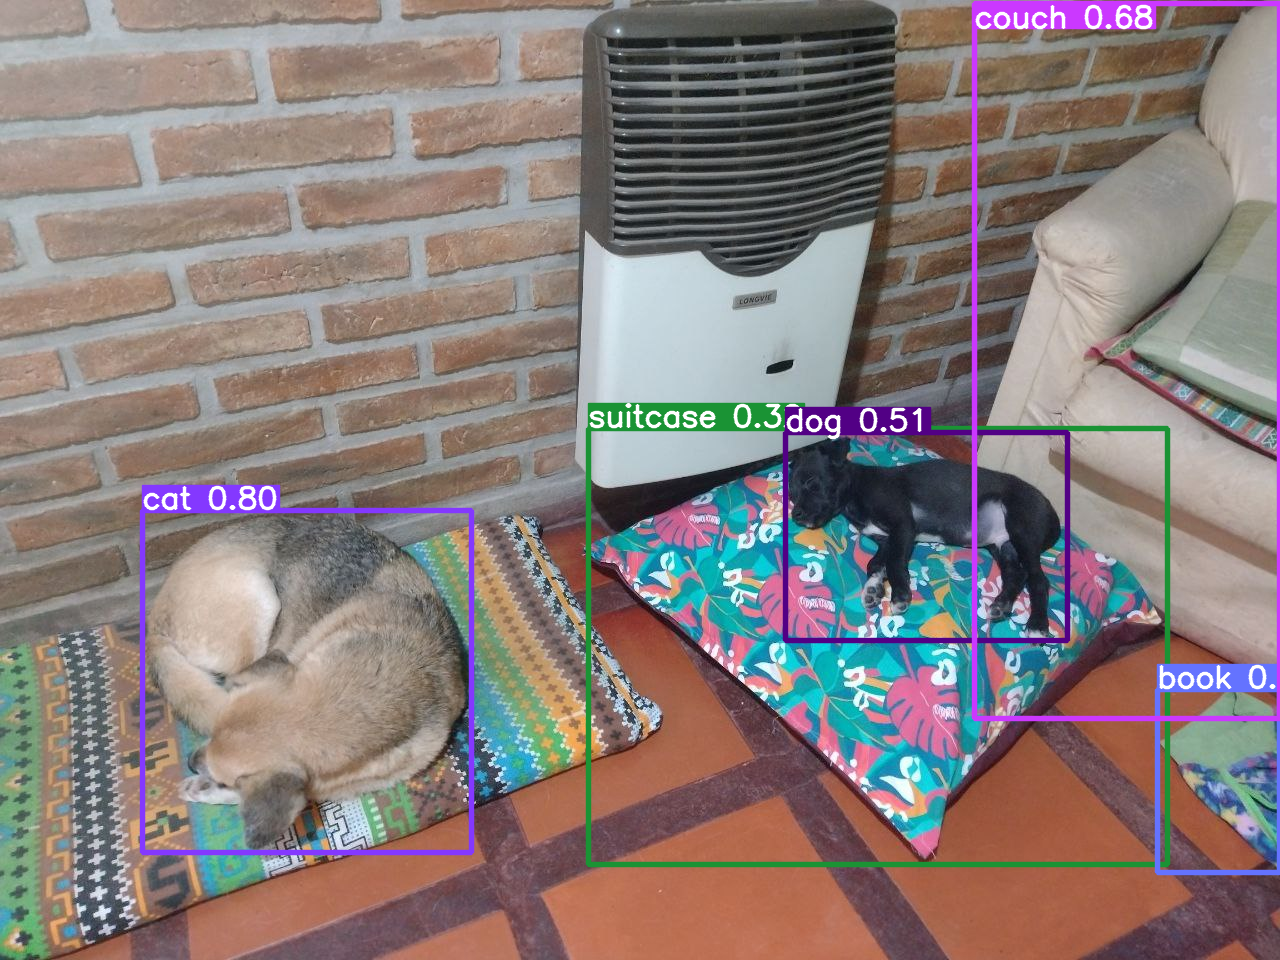

In [26]:
# Load the pre-trained YOLOv8 model
model = YOLO('yolov8n')  # This will automatically download the model weights
# Prueba con una imagen local
img_paths = ['./Sirius/Sirius-acostado.jpg', './Sirius/Sirius-cuerpo-entero.jpg',
             './Sirius/Sirius-primer-plano-borroso.jpg', './Sirius/Sirius-cuerpo-entero-contraluz.jpg', './Sirius/Sirius-Dos-perros-y-objetos.jpg']# Reemplaza con la ruta de tu imagen

# Run batched inference on a list of images
results = model(img_paths)

# Process results list
for i, result in enumerate(results):
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    result.show()  # display to screen
    filename_result = f'result_{i}.jpg'
    result.save(filename=filename_result)  # save to disk